## Unsupervised Machine Learning: Clustering Songs BIG AUDIO DATA (5000 songs)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('big_df_audio_features.csv/big_df_audio_features.csv')

#### 1. Data preparation

In [3]:
df.drop(columns={'mode', 'key', 'speechiness', 'liveness', 'time_signature', 'duration_ms'}, inplace=True)

In [4]:
df.set_index(["name","artist"], inplace=True)

In [5]:
df

,,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,-13.141,0.694,0.000059,0.3060,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,-12.646,0.217,0.000002,0.6930,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,-11.048,0.453,0.000063,0.9050,93.698
Mulher Eu Sei,Chico César,0.7050,0.05020,-18.115,0.879,0.000041,0.5240,106.802
Rosa Morena,Kurt Elling,0.6510,0.11900,-19.807,0.916,0.000343,0.4020,120.941
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,0.917,0.715000,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,-21.873,0.855,0.426000,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,-42.959,0.951,0.969000,0.0344,71.573


#### 2. Modelling

In [6]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(df)

MinMaxScaler()

In [7]:
df_scaled = minmax.transform(df)

In [8]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

In [9]:
df_scaled.head(30)

,,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.696787,0.000060,0.310660,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.217871,0.000002,0.703553,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,0.454819,0.000064,0.918782,0.437862
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.882530,0.000041,0.531980,0.499098
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.919679,0.000348,0.408122,0.565171
Desafinado,Stan Getz,0.481903,0.1460,0.692837,0.934739,0.156345,0.429442,0.667718
Trem Das Onze,Nossa Alma Canta,0.704240,0.6270,0.811956,0.660643,0.047411,0.408122,0.463330
Madalena,Maria Gasolina,0.698035,0.2070,0.752828,0.966867,0.420305,0.694416,0.437081
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.521200,0.7330,0.803365,0.698795,0.000057,0.899492,0.451259


##### Four plots:
    1. row: y-label = instrumentalness     1. column: x-label = energy
    2. row: y-label = danceability         2. column: x-label = tempo

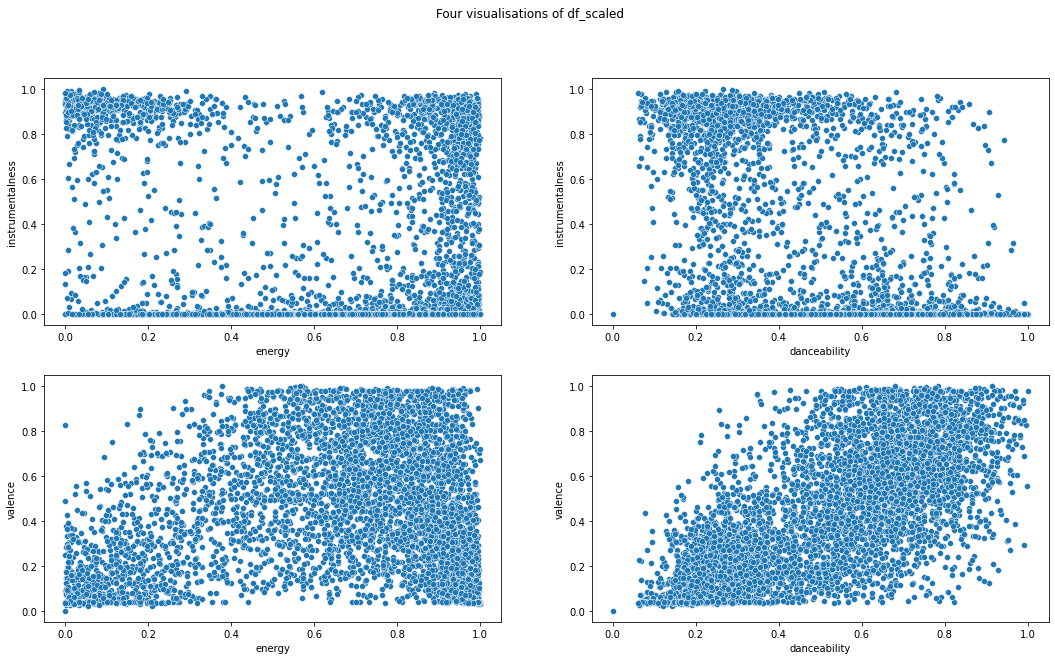

In [10]:
plot_data = pd.DataFrame(df_scaled)
plot_data.columns = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']

fig, axs = plt.subplots(figsize=(18, 10))
fig.suptitle('Four visualisations of df_scaled')

# 1. row: y-label = instrumentalness

plt.subplot(2, 2, 1)
sns.scatterplot(data=plot_data, x='energy', y='instrumentalness')
plt.subplot(2, 2, 2)
sns.scatterplot(data=plot_data, x='danceability', y='instrumentalness')

# 2. row: y-label = valence

plt.subplot(2, 2, 3)
sns.scatterplot(data=plot_data, x='energy', y='valence')
plt.subplot(2, 2, 4)
sns.scatterplot(data=plot_data, x='danceability', y='valence')

plt.show()

##### Clustering:
    1. Inertia-Elbow-methode to get a cluster number
    2. Valiating cluster number with Silhouette-score-methode

In [11]:
from sklearn.cluster import KMeans

In [12]:
df_scaled_new = df_scaled.drop({'loudness', 'acousticness','tempo'}, axis=1)

In [13]:
inertia_list = []
for i in range(1,30):
    mykmeans = KMeans(n_clusters=i)
    mykmeans.fit(df_scaled_new)
    inertia_list.append(round(mykmeans.inertia_))

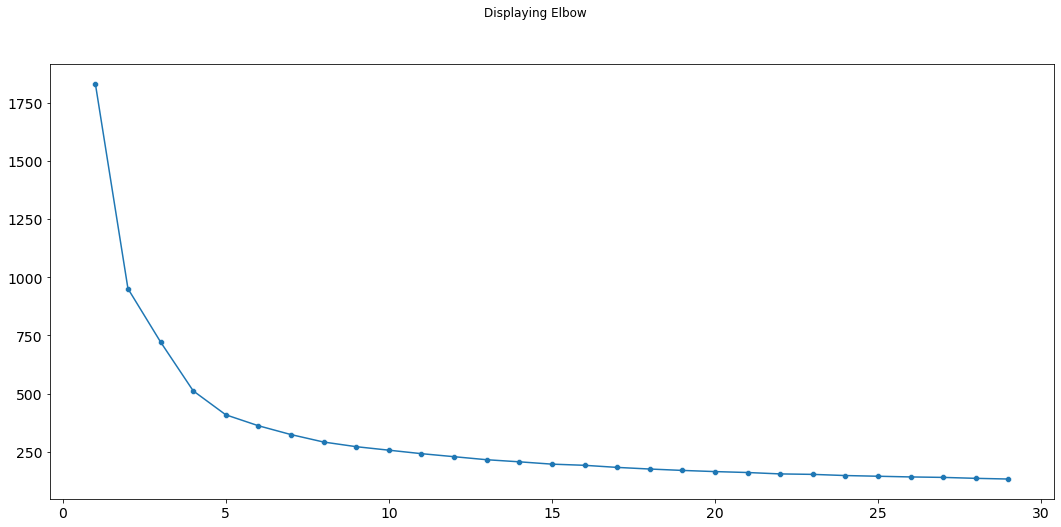

In [14]:
fig, axs = plt.subplots(figsize=(18, 8))
fig.suptitle('Displaying Elbow')

sns.lineplot(x=range(1,30), y=inertia_list)
sns.scatterplot(x=range(1,30), y=inertia_list)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# seems that the elbow is at cluster = 5

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score_list = []
for i in range(2, 30):
    mykmeans = KMeans(n_clusters=i).fit(df_scaled_new)
    s_score = silhouette_score(df_scaled_new, mykmeans.labels_)
    silhouette_score_list.append(s_score)

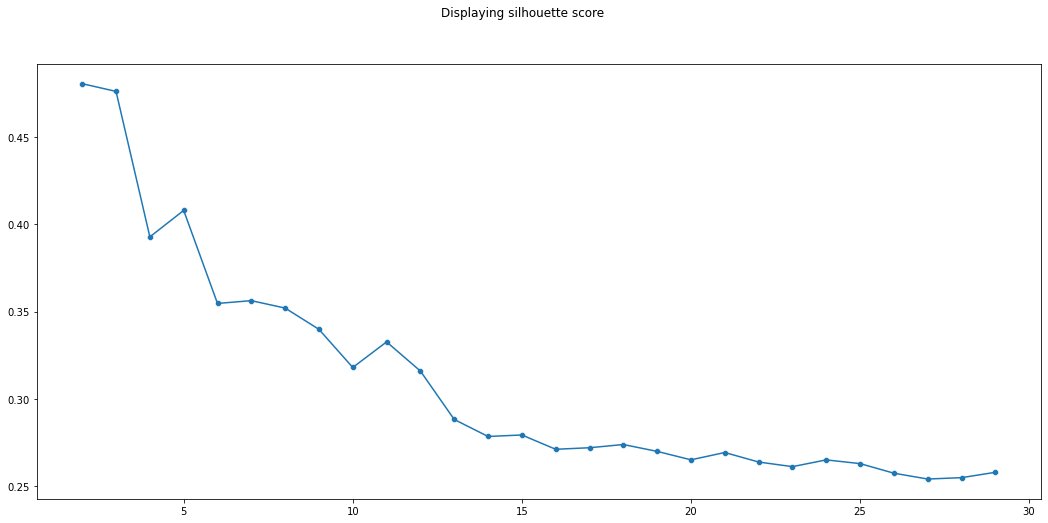

In [17]:
fig, axs = plt.subplots(figsize=(18, 8))
fig.suptitle('Displaying silhouette score')

sns.lineplot(x=range(2,30), y=silhouette_score_list)
sns.scatterplot(x=range(2,30), y=silhouette_score_list)
plt.show()

In [18]:
clkmeans = KMeans(n_clusters=12)
clkmeans.fit(df_scaled_new)

KMeans(n_clusters=12)

In [19]:
clkmeans.cluster_centers_

array([[0.74769877, 0.81461192, 0.01041126, 0.83896677],
       [0.2706036 , 0.90525467, 0.87683159, 0.22066809],
       [0.2931673 , 0.93841176, 0.06379014, 0.18731996],
       [0.31372507, 0.1157844 , 0.88878716, 0.14424239],
       [0.61093212, 0.37481035, 0.02545123, 0.502635  ],
       [0.51033629, 0.85055288, 0.03296275, 0.58294856],
       [0.62692413, 0.67958621, 0.76257075, 0.63606395],
       [0.60028256, 0.73216916, 0.01681109, 0.27035881],
       [0.34858368, 0.21062379, 0.0543604 , 0.19766201],
       [0.7649991 , 0.71853394, 0.01025986, 0.55152983],
       [0.29783511, 0.90289956, 0.51705717, 0.2216953 ],
       [0.71926209, 0.53708506, 0.01495268, 0.84013536]])

In [20]:
cl_pos = pd.DataFrame(clkmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy', 'instrumentalness', 'valence']
cl_pos

,danceability,energy,instrumentalness,valence
0,0.747699,0.814612,0.010411,0.838967
1,0.270604,0.905255,0.876832,0.220668
2,0.293167,0.938412,0.063790,0.187320
3,0.313725,0.115784,0.888787,0.144242
4,0.610932,0.374810,0.025451,0.502635
5,0.510336,0.850553,0.032963,0.582949
6,0.626924,0.679586,0.762571,0.636064
7,0.600283,0.732169,0.016811,0.270359
8,0.348584,0.210624,0.054360,0.197662
9,0.764999,0.718534,0.010260,0.551530


In [21]:
cluster = clkmeans.predict(df_scaled_new)
df_scaled_new_with_12_clusters = df_scaled_new.copy()
df_scaled_new_with_12_clusters["cluster"] = cluster
df_scaled_new

,,danceability,energy,instrumentalness,valence
name,artist,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.000060,0.310660
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.000002,0.703553
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.000064,0.918782
Mulher Eu Sei,Chico César,0.729059,0.05020,0.000041,0.531980
Rosa Morena,Kurt Elling,0.673216,0.11900,0.000348,0.408122
...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.725888,0.066497
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.432487,0.036041
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.983756,0.034924


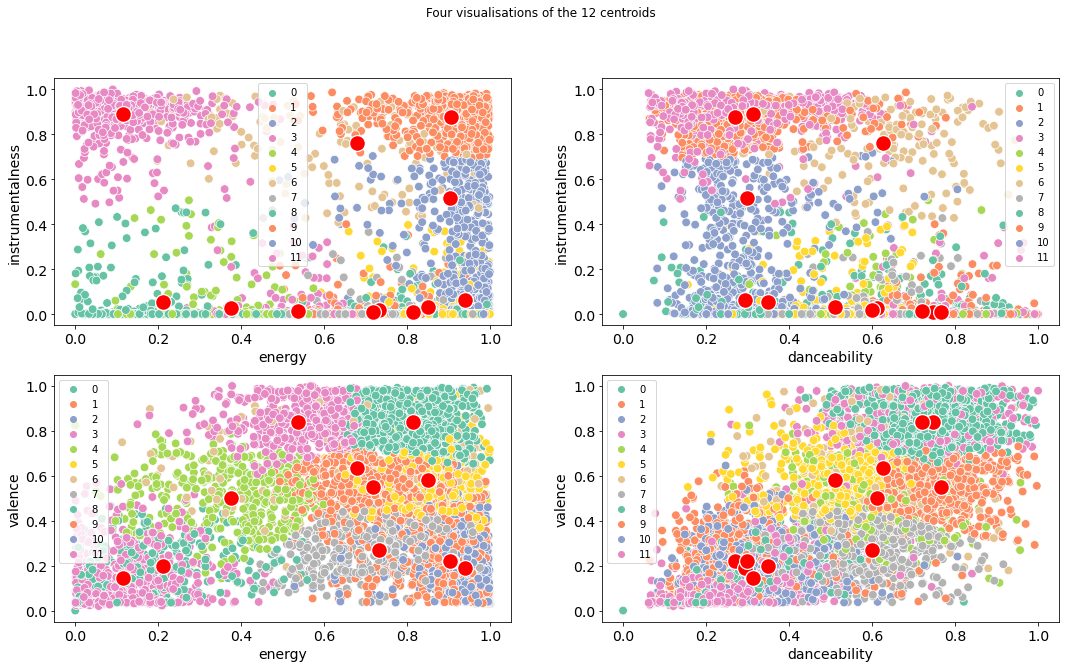

In [23]:
plot_data = pd.DataFrame(df_scaled_new_with_12_clusters)
plot_data.columns = ['danceability', 'energy', 'instrumentalness', 'valence', 'cluster']
plot_data['cluster'] = clkmeans.labels_

fig, axs = plt.subplots(figsize=(18, 10))
fig.suptitle('Four visualisations of the 12 centroids')


# 1. row: y-label = instrumentalness

plt.subplot(2, 2, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('energy', fontsize=14)
plt.ylabel('instrumentalness', fontsize=14)
sns.scatterplot(data=plot_data, x='energy', y='instrumentalness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='energy', y='instrumentalness', color='red', s=250)
plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('danceability', fontsize=14)
plt.ylabel('instrumentalness', fontsize=14)
sns.scatterplot(data=plot_data, x='danceability', y='instrumentalness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='instrumentalness', color='red', s=250)

# 2. row: y-label = valence

plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('energy', fontsize=14)
plt.ylabel('valence', fontsize=14)
sns.scatterplot(data=plot_data, x='energy', y='valence', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='energy', y='valence', color='red', s=250)
plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('danceability', fontsize=14)
plt.ylabel('valence', fontsize=14)
sns.scatterplot(data=plot_data, x='danceability', y='valence', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='valence', color='red', s=250)

plt.show()

In [24]:
df_scaled_new_with_12_clusters.query('cluster == 1').sample(20)

,,danceability,energy,instrumentalness,valence,cluster
name,artist,,,,,
Wash Away the Filth,Comecon,0.245088,0.892,0.734010,0.232487,1
Cold Black Piece of Flesh,Sacrificium,0.196484,0.953,0.923858,0.101320,1
Chewed To Stubs,Broken Hope,0.283351,0.864,0.867005,0.243655,1
Testimony,Vader,0.230610,0.640,0.801015,0.052589,1
Importance Of The Dimensionless Mirage,Xysma,0.127198,0.973,0.846701,0.424365,1
Regurgitation of Giblets,Carcass,0.128232,0.812,0.942132,0.054619,1
Blood Brothers,Malevolent Creation,0.355739,0.989,0.780711,0.045990,1
Blood On White,Funebre,0.224405,0.740,0.847716,0.323858,1
Biohazard,Massacre,0.328852,0.930,0.835533,0.434518,1
